In [1]:
import pandas as pd 
import os 
from os import listdir
from os.path import isfile, join
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from networkx.algorithms.community import k_clique_communities
import scipy.stats 
from networkx.algorithms import isomorphism

## Step 1: Load edge data 

In [2]:
%cat allEdges_medium.dat | head -10

4	66
5	49
6	56
8	66
9	88
11	68
12	13
15	64
16	71
16	77


In [3]:
real_network_edges='allEdges_medium.dat'
real_edges=np.loadtxt(real_network_edges,delimiter="\t", usecols=(0,1),dtype=float,skiprows=0).astype(int)
G=nx.Graph()
G.add_edges_from(real_edges)

## Step 2: Basic properties


In [4]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
#degrees = dict(G.degree())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
#print(f"Node degrees: {degrees}")

Number of nodes: 3369
Number of edges: 3589


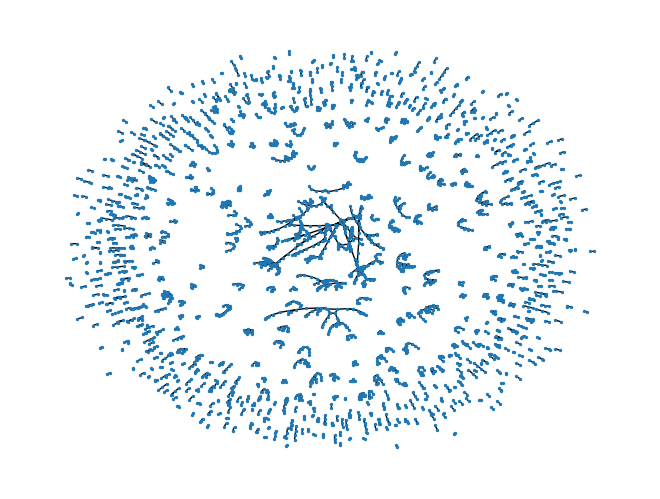

In [5]:
nx.draw(
    G, 
    #with_labels=True, 
    node_size=2,  # Customize node size
    #font_size=18,   # Customize label size
    #node_color="skyblue",  # Color of the nodes
    #edge_color="gray"      # Color of the edges
)

## Step 3: Define clusters 

In [6]:
components = list(nx.connected_components(G))
print(f"Connected Components: {components}")

# Number of connected components
num_components = nx.number_connected_components(G)
print(f"Number of Connected Components: {num_components}")

Connected Components: [{8, 66, 4}, {81, 49, 5}, {56, 6}, {88, 9}, {11, 68}, {12, 13}, {64, 370, 63, 15}, {98, 71, 76, 77, 16}, {35, 34, 19, 43}, {89, 65, 20}, {292, 78, 23}, {24, 42}, {50, 86}, {226, 357, 262, 75, 335}, {104, 79}, {96, 82, 99, 205}, {105, 85}, {114, 91, 87}, {102, 95}, {113, 106}, {115, 107, 108}, {152, 118, 119}, {121, 122, 165, 166}, {128, 161, 129, 162, 132, 137, 155, 142, 143, 154, 123, 124, 127}, {130, 126, 135}, {160, 131, 164, 145, 150, 151, 159}, {136, 138, 139, 146, 149}, {144, 156}, {147, 148}, {153, 158}, {168, 167}, {173, 174}, {192, 193, 175, 190, 191}, {293, 294, 295, 329, 269, 176, 282}, {180, 279}, {227, 229, 392, 393, 394, 213, 181, 214}, {182, 623}, {202, 300, 185, 186, 219, 220}, {661, 790, 792, 665, 666, 795, 667, 668, 805, 302, 688, 691, 692, 693, 188, 717, 210, 854, 855, 735, 736, 738, 877, 878, 879, 759, 761, 635, 636, 638, 639}, {209, 189}, {194, 196}, {203, 221}, {243, 206}, {208, 288, 301}, {249, 211}, {216, 217, 218, 254}, {225, 231}, {240, 2

In [7]:
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)

# Print components and their sizes
cluster=[]
total_nodes=0

for component in connected_components:
    print(f"Cluster: {sorted(component)}, Size: {len(component)}")
    if len(component)>2:
        cluster.append(list(component))
        total_nodes+=len(component)


Cluster: [1178, 1179, 1180, 1203, 1204, 1205, 1224, 1225, 1255, 1257, 1288, 1289, 1290, 1291, 1292, 1325, 1327, 1328, 1356, 1357, 1359, 1360, 1375, 1377, 1403, 1404, 1405, 1406, 1441, 1442, 1444, 1473, 1474, 1475, 1477, 1478], Size: 36
Cluster: [2116, 2117, 2118, 2164, 2168, 2252, 2255, 2304, 2305, 2308, 2309, 2350, 2351, 2352, 2402, 2405, 2406, 2407, 2408, 2409, 2410, 2440, 2441, 2472, 2473, 2509, 2511, 2512, 2566, 2567, 2569, 2572, 2573, 2574, 2576], Size: 35
Cluster: [617, 620, 647, 648, 649, 650, 672, 674, 676, 677, 678, 697, 698, 700, 705, 721, 722, 723, 742, 744, 748, 767, 768, 769, 770, 801, 811, 812, 835, 836, 860, 861, 863], Size: 33
Cluster: [882, 883, 902, 903, 904, 907, 908, 909, 913, 914, 915, 916, 917, 918, 919, 920, 929, 930, 940, 947, 948, 949, 958, 959, 960, 967, 968, 969, 971, 972, 980, 981, 982], Size: 33
Cluster: [188, 210, 302, 635, 636, 638, 639, 661, 665, 666, 667, 668, 688, 691, 692, 693, 717, 735, 736, 738, 759, 761, 790, 792, 795, 805, 854, 855, 877, 878, 879]

In [8]:
print("Total number of cluster", len(cluster))
print("Total number of nodes in cluster", total_nodes)

Total number of cluster 481
Total number of nodes in cluster 2803


## Step 4: Define motifs 

In [9]:
def pre_define_motifs():
    motif_subgraph=[]
    
    n=10
    for j in range(3,n):
    	for i in range(j):
    		a=j-i
    		b=i
    		if (a>1) & (a<5):
    			G = nx.lollipop_graph(a,b)
    			motif_subgraph.append(G)
    			
    edge11=[[0,1],[1,2],[2,3],[3,0],[0,2]]
    G=nx.Graph()
    G.add_edges_from(edge11)
    motif_subgraph.append(G)
    
    edge11=[[0,1],[1,2],[2,3],[3,0],[0,2],[3,4]]
    G=nx.Graph()
    G.add_edges_from(edge11)
    motif_subgraph.append(G)
    
    edge11=[[0,1],[1,2],[2,3],[3,0],[0,2],[3,4],[4,5]]
    G=nx.Graph()
    G.add_edges_from(edge11)
    motif_subgraph.append(G)
    
    edge11=[[0,1],[1,2],[2,3],[3,0],[0,2],[3,4],[4,5],[5,6]]
    G=nx.Graph()
    G.add_edges_from(edge11)
    motif_subgraph.append(G)
    
    edge21=[[0,1],[1,2],[2,3],[3,0],[1,3]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[0,1],[1,2],[2,3],[3,0],[1,3],[3,4]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[0,1],[1,2],[2,3],[3,0],[1,3],[3,4],[4,5]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[0,1],[1,2],[2,3],[3,0],[1,3],[3,4],[4,5],[5,6]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    for b in range(n-1):
    	#H=nx.generators.harary_graph.hnm_harary_graph(a,b)
    	if b>3:
    		H=nx.generators.cycle_graph(b)
    		motif_subgraph.append(H)
    
    		node=list(H.nodes())
    		edge=list(H.edges())
    		t=max(node)
    		edge.append([t,t+1])
    		G=nx.Graph()
    		G.add_edges_from(edge)
    		motif_subgraph.append(G)
    
    		edge.append([t+1,t+2])
    		G=nx.Graph()
    		G.add_edges_from(edge)	
    		motif_subgraph.append(G)
    
    		edge.append([t+2,t+3])
    		G=nx.Graph()
    		G.add_edges_from(edge)
    		motif_subgraph.append(G)
    
    
    for b in range(n-1):
    	#H=nx.generators.harary_graph.hnm_harary_graph(a,b)
    	if (b>4)&(b<7):
    		H=nx.generators.wheel_graph(b)
    		motif_subgraph.append(H)
    		
    		node=list(H.nodes())
    		edge=list(H.edges())
    		t=max(node)
    		edge.append([t,t+1])
    		G=nx.Graph()
    		G.add_edges_from(edge)
    		motif_subgraph.append(G)
    
    		edge.append([t+1,t+2])
    		G=nx.Graph()
    		G.add_edges_from(edge)
    		motif_subgraph.append(G)
    
    		edge.append([t+2,t+3])
    		G=nx.Graph()
    		G.add_edges_from(edge)
    		motif_subgraph.append(G)
    
    
    edge21=[[1,3],[2,3],[3,4]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[1,3],[2,3],[3,4],[4,5]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[4,6]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[5,6]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[2,6]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[4,6],[6,7]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[5,6],[6,7]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[5,6],[2,7]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)
    
    edge21=[[1,3],[2,3],[3,4],[4,5],[2,6],[1,7]]
    G=nx.Graph()
    G.add_edges_from(edge21)
    motif_subgraph.append(G)

    return motif_subgraph 

motif_subgraph=pre_define_motifs()
print('Number of motifs defined',len(motif_subgraph))


Number of motifs defined 65


## Step 5: Visualize Motifs 

/var/folders/nq/zfgvhqq53z17dsdjtm98cn5c0000gq/T/ipykernel_96120/622455856.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2,2))


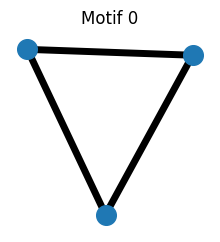

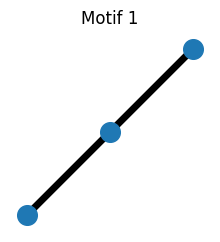

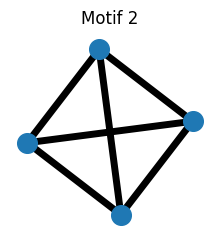

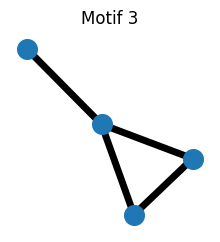

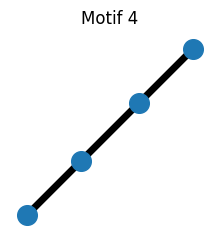

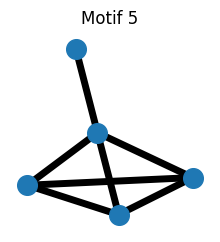

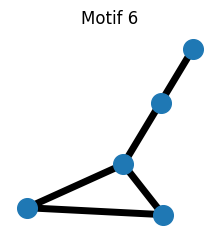

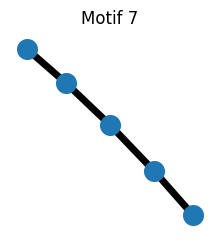

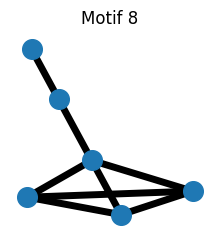

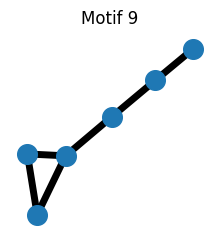

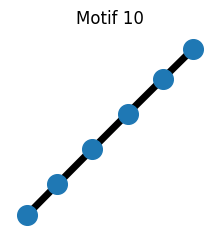

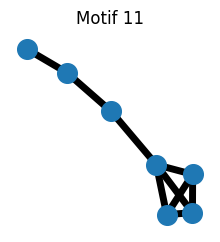

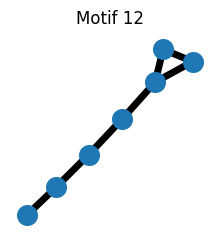

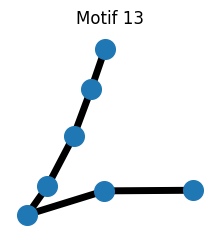

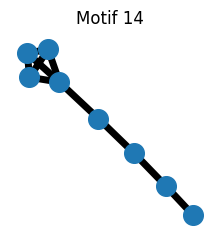

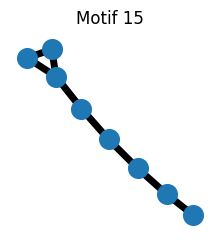

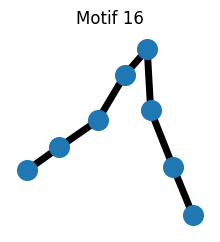

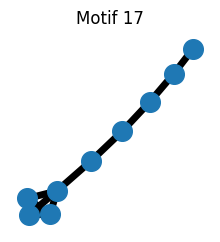

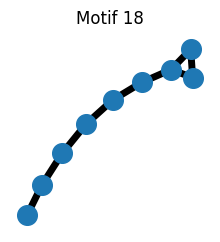

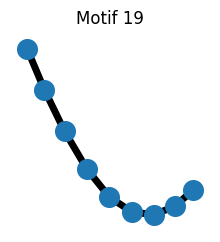

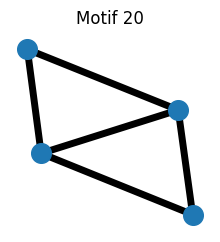

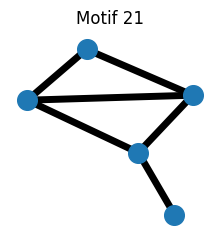

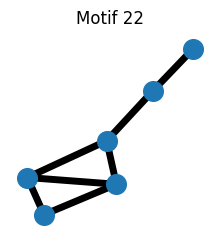

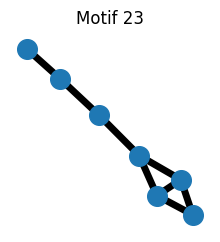

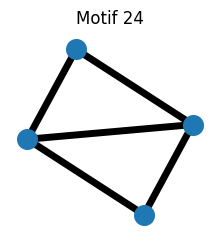

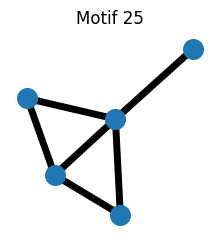

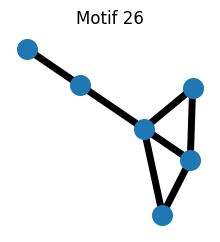

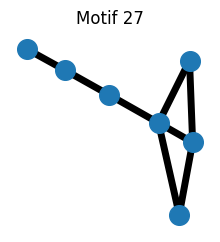

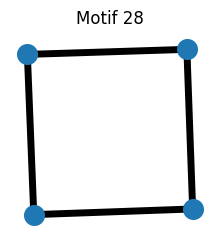

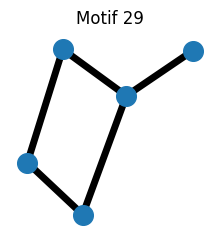

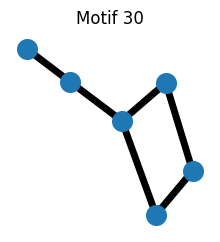

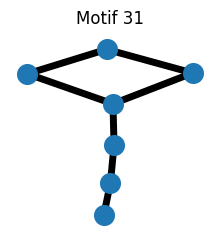

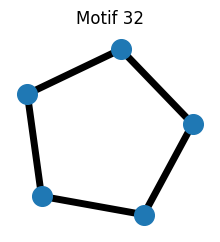

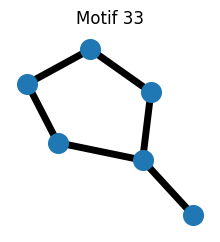

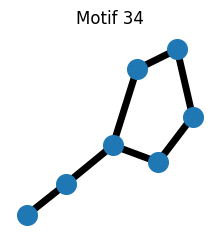

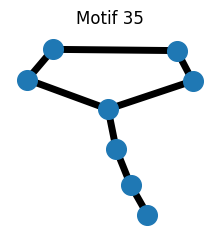

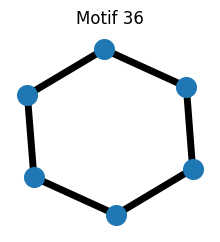

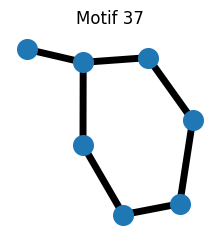

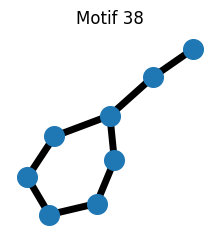

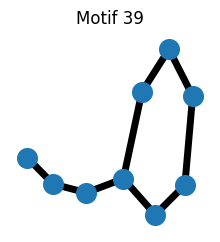

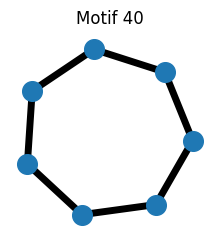

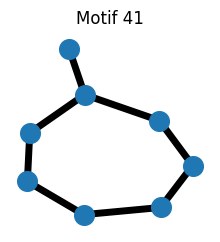

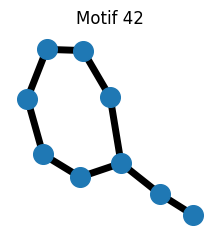

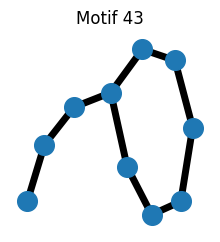

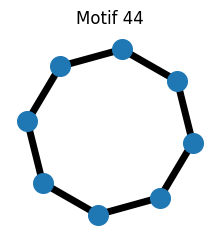

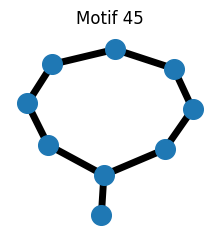

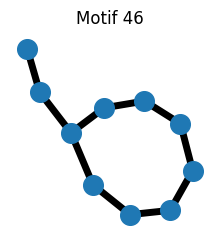

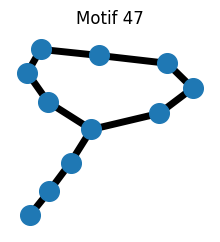

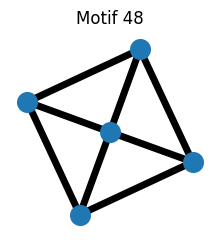

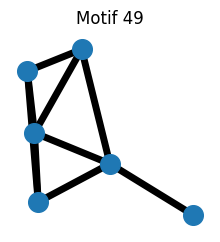

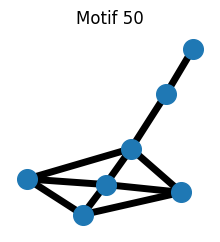

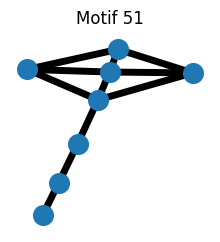

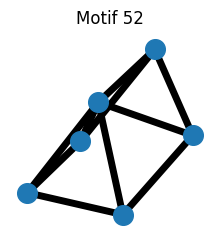

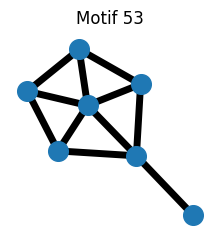

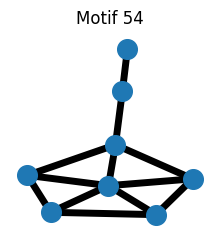

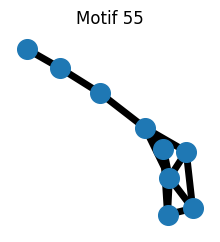

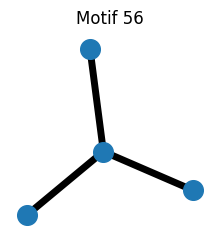

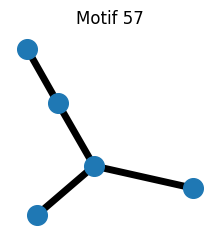

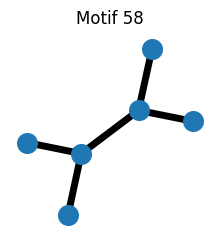

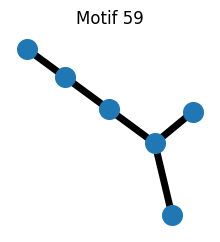

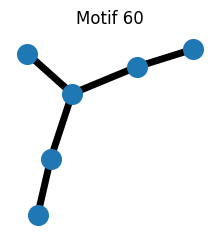

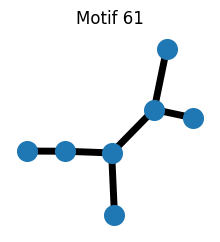

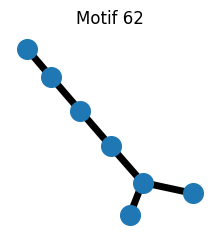

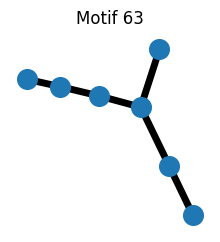

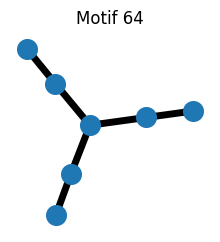

In [10]:

for i in range(len(motif_subgraph)):
    G=motif_subgraph[i]
    plt.figure(figsize=(2,2))
    nx.draw(G, node_size=200, with_labels=False, width=5)
    #plt.savefig('Harary/'+'Graphlet_'+str(count)+'_mine2('+str(4)+ ',3).png',transparent=True)
    plt.title('Motif '+str(i))
    #plt.close('all')

In [11]:
plt.close('all')

## Step 6: Define function for connected edges from the given vertices 

In [12]:
                 
def search_edges(edges,vertices):

	unique_edges=[]
	d={}
	for i in range(len(edges)):
		#print(edges[i])
		fake=str(edges[i,0])+'-'+str(edges[i,1])
		if fake not in d:
			unique_edges.append(edges[i])
	
	edges=unique_edges
	
	#print(edges[i][0])
	
	count=1
	myedges=[]
	d={}
	for j in range(len(edges)):
		flag1=0;
		flag2=0;
		for i in range(len(vertices)):
			#print(edges[j][0],vertices[i])
			if edges[j][0]==vertices[i]:
				flag1=1
			if edges[j][1]==vertices[i]:
				flag2=1

		if (flag1+flag2)==2:
			name=str(edges[j][0])+'-'+str(edges[j][1])
			if name not in d:
				myedges.append(edges[j]);
                	
				
	return myedges
 	


## Step 7: Define function for searching local subgraph from global subgraph 

In [13]:
def searchSubgraph(G,G2):
	gm=nx.algorithms.isomorphism.GraphMatcher(G,G2)
	#answer=gm.subgraph_is_isomorphic()
	#answer=gm.mapping.items()
	answer=gm.subgraph_isomorphisms_iter()

	frequency=[]
	d={}
	for i in answer:
		a=list(i.keys())
		b=sorted(a)
		name=''
		for k in b:
			name+=str(k)+'-'

		#print(name)
		if name not in d:
			d[name]=1
			frequency.append(b)

	return frequency

In [14]:
def visualize_motif_in_a_cluster(Gclu,fid):
    # Define a color map for nodes
    pos = nx.spring_layout(Gclu) 
    color_map = []
    for node in Gclu.nodes():
        if node in frequency[fid]:  # Nodes you want to highlight
            color_map.append('red')  # Highlighted nodes
        else:
            color_map.append('blue')  # Default nodes
    
    # Draw the graph
    nx.draw(Gclu, pos,with_labels=True, node_color=color_map, node_size=800, alpha=0.8, font_size=12)
    return 0     

## Step 8: Interest of motif

Text(0.5, 1.0, 'Motif 2')

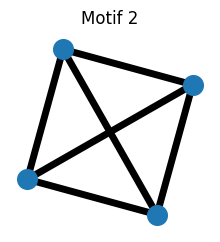

In [15]:

interest_of_motif=2 
G=motif_subgraph[interest_of_motif]
plt.figure(figsize=(2,2))
nx.draw(G, node_size=200, with_labels=False, width=5)
plt.title('Motif '+str(interest_of_motif))


In [16]:
interest_of_cluster=14
print(cluster[interest_of_cluster],len(cluster[interest_of_cluster]))

[2944, 3200, 3300, 3140, 3044, 2888, 2889, 2890, 2891, 2989, 2830, 2831, 3092, 3252, 2939, 2941, 2943] 17


In [17]:

ed=search_edges(real_edges,cluster[interest_of_cluster])
Gclu=nx.Graph()
Gclu.add_edges_from(ed)

H=motif_subgraph[interest_of_motif]
frequency=searchSubgraph(Gclu,H)

print("Motif of interest", interest_of_motif, len(frequency), frequency)

Motif of interest 2 1 [[2888, 2889, 3140, 3200]]


0

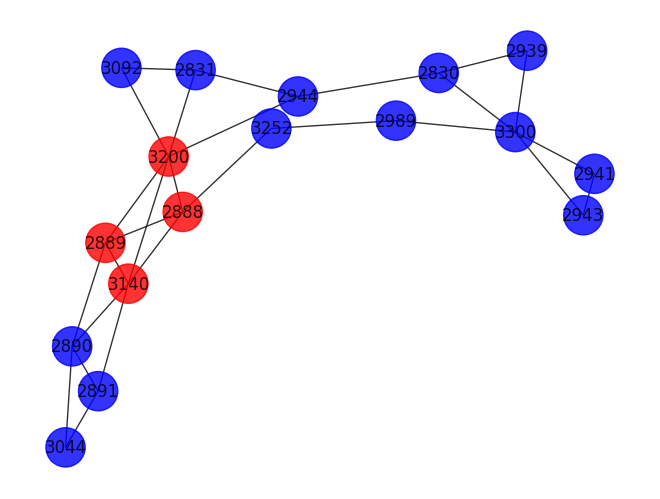

In [18]:
visualize_motif_in_a_cluster(Gclu,0)

## Step 9: Another interest of motif

Text(0.5, 1.0, 'Motif 57')

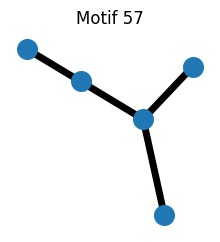

In [19]:
interest_of_motif=57
G=motif_subgraph[interest_of_motif]
plt.figure(figsize=(2,2))
nx.draw(G, node_size=200, with_labels=False, width=5)
plt.title('Motif '+str(interest_of_motif))

In [20]:

ed=search_edges(real_edges,cluster[interest_of_cluster])
Gclu=nx.Graph()
Gclu.add_edges_from(ed)

H=motif_subgraph[interest_of_motif]
frequency=searchSubgraph(Gclu,H)

print("Motif of interest", interest_of_motif, len(frequency), frequency)

Motif of interest 57 13 [[2830, 2941, 2989, 3252, 3300], [2830, 2943, 2989, 3252, 3300], [2939, 2941, 2989, 3252, 3300], [2939, 2943, 2989, 3252, 3300], [2890, 2944, 3092, 3140, 3200], [2891, 2944, 3092, 3140, 3200], [2888, 2944, 3092, 3200, 3252], [2889, 2890, 2944, 3092, 3200], [2830, 2944, 3092, 3140, 3200], [2830, 2888, 2944, 3092, 3200], [2830, 2889, 2944, 3092, 3200], [2830, 2941, 2944, 2989, 3300], [2830, 2943, 2944, 2989, 3300]]


0

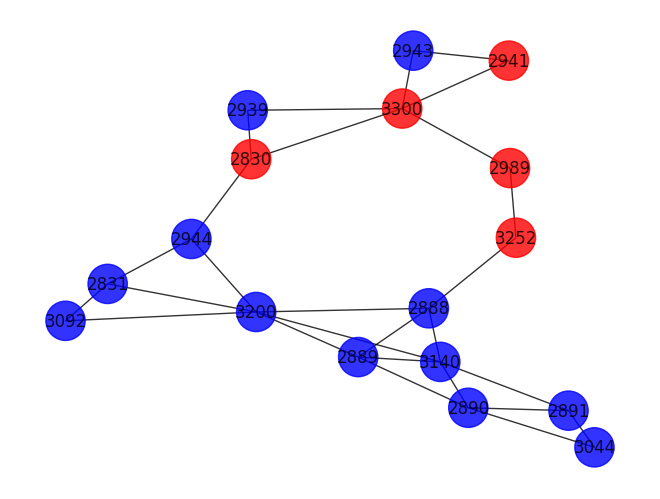

In [21]:
visualize_motif_in_a_cluster(Gclu,0)

0

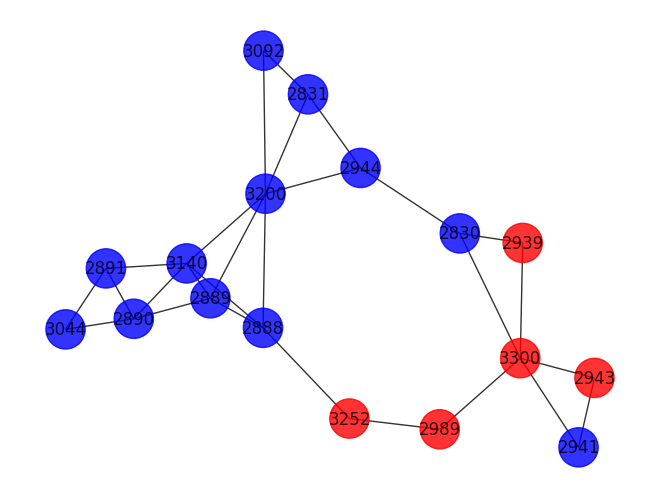

In [22]:
visualize_motif_in_a_cluster(Gclu,3)

0

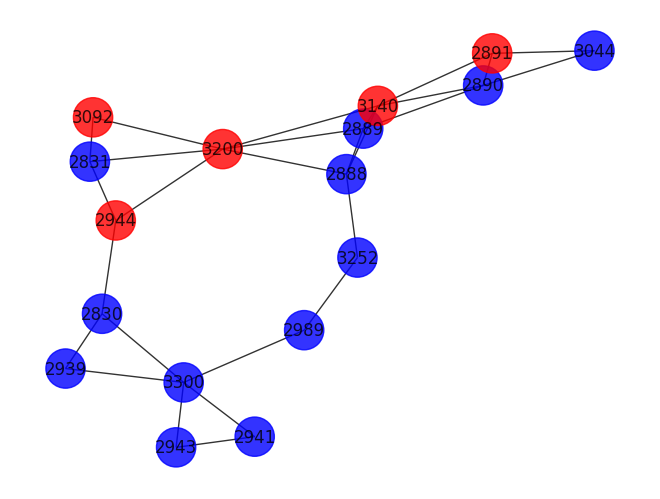

In [23]:
visualize_motif_in_a_cluster(Gclu,5)

## Step 10: Final interest of motif

Text(0.5, 1.0, 'Motif 39')

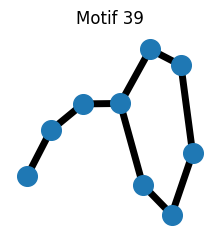

In [24]:
interest_of_motif=39
G=motif_subgraph[interest_of_motif]
plt.figure(figsize=(2,2))
nx.draw(G, node_size=200, with_labels=False, width=5)
plt.title('Motif '+str(interest_of_motif))

In [25]:
interest_of_cluster=17
print(cluster[interest_of_cluster],len(cluster[interest_of_cluster]))

[2595, 2531, 2275, 2534, 2535, 2532, 2186, 2321, 2322, 2227, 2132, 2323, 2229, 2487, 2488, 2425] 16


In [26]:
ed=search_edges(real_edges,cluster[interest_of_cluster])
Gclu=nx.Graph()
Gclu.add_edges_from(ed)

H=motif_subgraph[interest_of_motif]
frequency=searchSubgraph(Gclu,H)

print("Motif of interest", interest_of_motif, len(frequency), frequency)

Motif of interest 39 1 [[2132, 2186, 2321, 2323, 2487, 2531, 2534, 2535, 2595]]


0

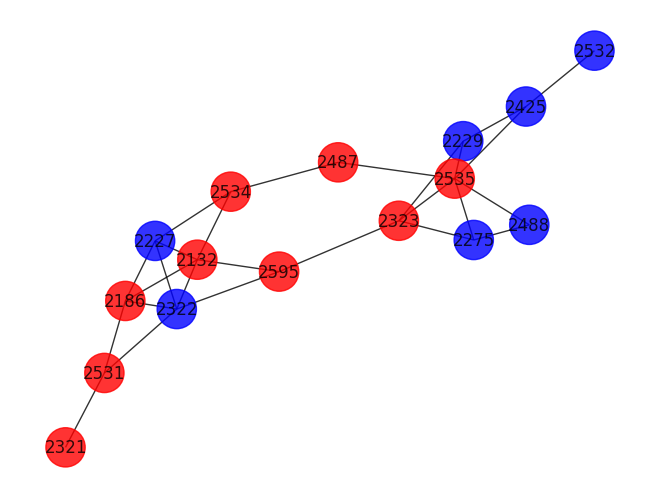

In [27]:
visualize_motif_in_a_cluster(Gclu,0)